# Deep Q-Learnig for Cartpole

This example is an implementation of Deep Q-learning for the cartpole problem  (see [OpenAI's Cartpole](https://gym.openai.com/envs/CartPole-v0/)).

This is an adapted version (by Martin Molina 2020) based on the implementation of [[Surma 2018](https://github.com/gsurma/cartpole)]


In [ ]:
import random
import gym
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
ENV_NAME = "CartPole-v1"

GAMMA = 0.95
LEARNING_RATE = 0.001
MEMORY_SIZE = 1000000
BATCH_SIZE = 20
EXPLORATION_MAX = 1.0
EXPLORATION_MIN = 0.01
EXPLORATION_DECAY = 0.995
NUMBER_OF_EPISODES = 100
MAX_STEPS = 200

In [ ]:
class DQNSolver:

    def __init__(self, observation_space, action_space):
    # Intialize the class

        self.exploration_rate = EXPLORATION_MAX
        self.action_space = action_space
        self.memory = deque(maxlen=MEMORY_SIZE)
        self.results = []

        # Neural model 
        self.model = Sequential()
        self.model.add(Dense(24, input_shape=(observation_space,), activation="relu"))
        self.model.add(Dense(24, activation="relu"))
        self.model.add(Dense(self.action_space, activation="linear"))
        self.model.compile(loss="mse", optimizer=Adam(lr=LEARNING_RATE))

    def add_result(self, step):
        self.results.append(step)

    def show_results(self):
        plt.plot(self.results)
        plt.xlabel("Episode")
        plt.ylabel("Score")

    def remember(self, state, action, reward, next_state, done):
    # Store a tuple (s, a, r, s') for experience replay

        self.memory.append((state, action, reward, next_state, done))

    def select(self, state):
    # Generate an action for a given state considering random generation for exploration

        if np.random.rand() < self.exploration_rate:
            return random.randrange(self.action_space)
        q_values = self.model.predict(state)
        return np.argmax(q_values[0])

    def learn(self):
    # Learn the value Q using a sample of examples in the memory of experiences

        # If the size of the stored steps is small, skip this 
        if len(self.memory) < BATCH_SIZE:
            return

        # Select a set of examples randomly    
        batch = random.sample(self.memory, BATCH_SIZE)

        # Update the neural model for each example
        for state, action, reward, next_state, terminal in batch:
            
            if not terminal:
               q_predicted_next_state = self.model.predict(next_state)
               q_target_for_action = reward + GAMMA * np.amax(q_predicted_next_state[0])
            else:
               q_target_for_action = reward
            
            q_target = self.model.predict(state)
            q_target[0][action] = q_target_for_action

            # Training the neural network with the new q_values
            self.model.train_on_batch(state, q_target)

        # Decrease exploration rate
        self.exploration_rate *= EXPLORATION_DECAY
        self.exploration_rate = max(EXPLORATION_MIN, self.exploration_rate)
  
            

In [ ]:
def cartpole():
# Main program

    # Initialization
    env = gym.make(ENV_NAME)
    observation_space = env.observation_space.shape[0]
    action_space = env.action_space.n
    dqn_solver = DQNSolver(observation_space, action_space)
    episode = 0
    goal_reached = False

    start_time = time.clock()

    while (episode < NUMBER_OF_EPISODES) and not (goal_reached):
        episode += 1
        state = env.reset()
        state = np.reshape(state, [1, observation_space])
        step = 0
        while True:
            step += 1
            
            # An action is selected using the neural network
            action = dqn_solver.select(state)

            # The action is executed  in the environment using AI Gym and a reward is obtained
            state_next, reward, terminal, info = env.step(action)

            # If the next state is terminal reward is negative
            reward = reward if not terminal else -reward

            state_next = np.reshape(state_next, [1, observation_space])

            # The result of the action is stored in memory (to be sampled later)
            dqn_solver.remember(state, action, reward, state_next, terminal)

            state = state_next

            # Learn using the experience stored in memory
            dqn_solver.learn()

            if terminal or step == MAX_STEPS:
                dqn_solver.add_result(step)
                rounded_exploration_rate = round(dqn_solver.exploration_rate,2)
                print("Episode " + str(episode) + " of " + str(NUMBER_OF_EPISODES) + ": " + str(step) + " (exploration rate: " + str(rounded_exploration_rate) + ")")
                if step == MAX_STEPS: 
                   goal_reached = True
                break 

    dqn_solver.show_results()
    seconds = round((time.clock() - start_time))
    if goal_reached: 
       print("Reached goal sucessfully")
    else:
       print("Failure to reach the goal")
    print ("Time:", round(seconds/60), "minutes")




Episode 1 of 100: 11 (exploration rate: 1.0)
Episode 2 of 100: 10 (exploration rate: 0.99)
Episode 3 of 100: 12 (exploration rate: 0.93)
Episode 4 of 100: 14 (exploration rate: 0.87)
Episode 5 of 100: 10 (exploration rate: 0.83)
Episode 6 of 100: 40 (exploration rate: 0.68)
Episode 7 of 100: 15 (exploration rate: 0.63)
Episode 8 of 100: 11 (exploration rate: 0.59)
Episode 9 of 100: 16 (exploration rate: 0.55)
Episode 10 of 100: 9 (exploration rate: 0.52)
Episode 11 of 100: 11 (exploration rate: 0.5)
Episode 12 of 100: 11 (exploration rate: 0.47)
Episode 13 of 100: 10 (exploration rate: 0.45)
Episode 14 of 100: 13 (exploration rate: 0.42)
Episode 15 of 100: 17 (exploration rate: 0.38)
Episode 16 of 100: 13 (exploration rate: 0.36)
Episode 17 of 100: 14 (exploration rate: 0.34)
Episode 18 of 100: 10 (exploration rate: 0.32)
Episode 19 of 100: 13 (exploration rate: 0.3)
Episode 20 of 100: 9 (exploration rate: 0.29)
Episode 21 of 100: 13 (exploration rate: 0.27)
Episode 22 of 100: 21 (expl

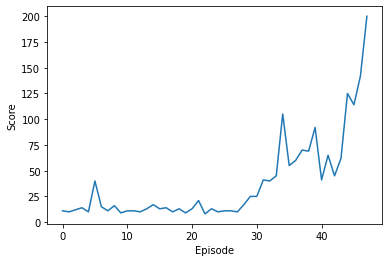

In [ ]:
cartpole()